# Relatório 1
Bianca Nunes Coelho <br>
15102880

##Bibliotecas

In [459]:
from __future__ import division
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator as ML
import numpy as np
from sympy import *

## Funções e Métodos

Os métodos Secante, Bisseção e Falsa Posição possuem apenas um código, em que há uma variavel N que determina se há limite de iterações. Quando N = 0, a função é delimitada pela tolerância. Quando N > 0, a função é delimitada pleo número de iterações. O método Newton-Raphson é o único em que códigos separados. <br>
Em todos os métodos foi delimitado apenas 10 casas após a vírgula.

In [460]:
##FUNÇÃO QUESTÃO 1
f_ex1 = lambda x: (x**4)-2*(x**3)-4*(x**2)+4*x+4

##FUNÇÃO QUESTÃO 2 
f_ex2 = lambda x: (x**5)-(10/9)*(x**3)+(5/21)*x
  ##Função e derivada para o Método Newton-Raphson
y = Symbol('y')
fex2 = (y**5)-(10/9)*(y**3)+(5/21)*y
df1_ex2 = fex2.diff(y)
f2 = lambdify(y,fex2)
dif2 = lambdify(y, df1_ex2)

##FUNÇÃO QUESTÃO 3
f_ex3 = lambda x: math.log(x**2)-0.7

##FUNÇÃO QUESTÃO 4
y = Symbol('y')
f_ex4 = lambda x: (x**3)-6*(x**2)+11*x-6.1
  ##Função e derivada para o Método Newton-Raphson
fex4 = (y**3)-6*(y**2)+11*y-(6.1)
df1_ex4 = fex4.diff(y)
f4 = lambdify(y,fex4)
dif4 = lambdify(y, df1_ex4)

###Método da Secante

In [461]:
#Método da Secante
# f = função
# x0 = aproximação inicial
# x1 = aproximação inicial
# e = tolerância
# N = número de iterações

def secante(f,x0,x1,e,N):
   
   if(math.fabs(f(x0)) < e):
     x = x0
     return x

   if(math.fabs(x1) < e) or (math.fabs(x1 - x0) < e):
      x = x1
      return x

   k = 0
   if N == 0:

    while( math.fabs(f(x0)) > e ):
        x2 = x1 -( (f(x1)/(f(x1) - f(x0))) * (x1-x0) )

        print(f'k: {k} | x: {x0:,.10f} |')

        if(math.fabs(x2) < e) or (math.fabs(x2 - x1) < e):
          x = x2
          return x
        else:
          x0 = x1
          x1 = x2
      
        k = k + 1
    
   else:
      while(k <= N):
        x2 = x1 -( (f(x1)/(f(x1) - f(x0))) * (x1-x0) )

        print(f'k: {k} | x: {x0:,.10f} |')

        if(math.fabs(x2) < e) or (math.fabs(x2 - x1) < e):
          x = x2
          return x
        else:
          x0 = x1
          x1 = x2
      
        k = k + 1

###Método de Newton-Raphson

In [462]:
#Método de Newton-Raphson
# f = função
# df1 = primeira derivada
# x0 = aproximação inicial
# e = tolerância
# N = número de iterações

def NR(f,df1,x0,e):
    if ( math.fabs(f(x0)) < e):
       x = x0
       return x
    
    k = 0
    while(  math.fabs(f(x0) ) > e):
        x1 = x0 - ( f(x0) / df1(x0))

        print(f'k: {k} | x: {x0:,.10f} | f(x): {f(x0):,.10f}')

        if( math.fabs(f(x1)) < e or math.fabs(x1 - x0) < e):
            x = x1
            return x
        else:
            x0 = x1
        k = k + 1

In [463]:
def NR_N(f,df1,x0,e,N):
    if ( math.fabs(f(x0)) < e):
       x = x0
       return x
    
    k = 0
    while( k <= N ):
        x1 = x0 - ( f(x0) / df1(x0))

        print(f'k: {k} | x: {x0:,.10f} | f(x): {f(x0):,.10f}')

        if( math.fabs(f(x1)) < e or math.fabs(x1 - x0) < e):
            x = x1
            return x
        else:
            x0 = x1
        k = k + 1

### Método de Bisseção

In [464]:
# Método de Bisseção
# [a,b] = intervalo
# e = tolerância de erro
# N = número de iterações
# f = função

def bissecao(a, b, f, e, N):
    if ((b - a) < e):
      x = (a + b)/2
      return x
    
    k = 0
    
    if N == 0:

      while((b - a) > e):
  
          M = f(a)
          x = (a + b)/2

          print(f'|k: {k}|a : {a:,.10f} |b : {b:,.10f} |x : {x:,.10f} |f(x) : {f(x):,.10f} |f(a) : {M:,.10f} |')

          if ((M * f(x)) > 0 ):
              a = x
              if((b - a) < e):
                x = (a + b)/2
                return x
          else:
              b = x    
          k = k + 1
    else:
       while(k <= N):
  
          M = f(a)
          x = (a + b)/2

          print(f'|k: {k}|a : {a:,.10f} |b : {b:,.10f} |x : {x:,.10f} |f(x) : {f(x):,.10f} |f(a) : {M:,.10f} |')

          if ((M * f(x)) > 0 ):
              a = x
              if((b - a) < e):
                x = (a + b)/2
                return x
          else:
              b = x    
          k = k + 1

### Método da Falsa Posição

In [465]:
# Método da Falsa Posição
# [a,b] = intervalo
# e1 , e2 = tolerância de erro
# N = número de iterações
# f = função

def falsa_posicao(f,a,b,e,N):

    if( (b - a) < e ):
      x = (a*f(b) - b*f(a)) / (f(b) - f(a))
      return x
    
    k = 0

    if N == 0:
      while((b - a) > e):
          M = f(a)
          x = (a*f(b) - b*f(a)) / (f(b) - f(a))
          print(f'k: {k}|a : {a:,.10f} | b : {b:,.10f} |x : {x:,.10f} |f(x) : {f(x):,.10f} ')

          if(math.fabs(f(x)) < e):
            x = (a*f(b) - b*f(a)) / (f(b) - f(a))
            return x
        
          if( M * f(x) > 0 ):
              a = x
              if( (b - a) < e ):
                x = (a*f(b) - b*f(a)) / (f(b) - f(a))
                return x
          else:
            b = x
          k = k + 1
    else:
        while(k <= N):
          M = f(a)
          x = (a*f(b) - b*f(a)) / (f(b) - f(a))
          print(f'k: {k}|a : {a:,.10f} | b : {b:,.10f} |x : {x:,.10f} |f(x) : {f(x):,.10f} ')

          if(math.fabs(f(x)) < e):
            x = (a*f(b) - b*f(a)) / (f(b) - f(a))
            return x
        
          if( M * f(x) > 0 ):
              a = x
              if( (b - a) < e ):
                x = (a*f(b) - b*f(a)) / (f(b) - f(a))
                return x
          else:
            b = x
          k = k + 1

# QUESTÕES

## QUESTÃO 1

In [466]:
## a) [-2 , -1]

print("BISSEÇÃO")
bissecao(-2,-1,f_ex1,0.01,0)


BISSEÇÃO
|k: 0|a : -2.0000000000 |b : -1.0000000000 |x : -1.5000000000 |f(x) : 0.8125000000 |f(a) : 12.0000000000 |
|k: 1|a : -1.5000000000 |b : -1.0000000000 |x : -1.2500000000 |f(x) : -0.9023437500 |f(a) : 0.8125000000 |
|k: 2|a : -1.5000000000 |b : -1.2500000000 |x : -1.3750000000 |f(x) : -0.2888183594 |f(a) : 0.8125000000 |
|k: 3|a : -1.5000000000 |b : -1.3750000000 |x : -1.4375000000 |f(x) : 0.1953277588 |f(a) : 0.8125000000 |
|k: 4|a : -1.4375000000 |b : -1.3750000000 |x : -1.4062500000 |f(x) : -0.0626668930 |f(a) : 0.1953277588 |
|k: 5|a : -1.4375000000 |b : -1.4062500000 |x : -1.4218750000 |f(x) : 0.0622625947 |f(a) : 0.1953277588 |
|k: 6|a : -1.4218750000 |b : -1.4062500000 |x : -1.4140625000 |f(x) : -0.0012081228 |f(a) : 0.0622625947 |


In [467]:
print("FALSA POSIÇÃO")
falsa_posicao(f_ex1,-2,-1,0.01,0)

FALSA POSIÇÃO
k: 0|a : -2.0000000000 | b : -1.0000000000 |x : -1.0769230769 |f(x) : -1.1037428661 
k: 1|a : -2.0000000000 | b : -1.0769230769 |x : -1.1546748750 |f(x) : -1.0951798970 
k: 2|a : -2.0000000000 | b : -1.1546748750 |x : -1.2253713519 |f(x) : -0.9731421783 
k: 3|a : -2.0000000000 | b : -1.2253713519 |x : -1.2834778460 |f(x) : -0.7809393493 
k: 4|a : -2.0000000000 | b : -1.2834778460 |x : -1.3272586926 |f(x) : -0.5759683313 
k: 5|a : -2.0000000000 | b : -1.3272586926 |x : -1.3580696551 |f(x) : -0.3985324945 
k: 6|a : -2.0000000000 | b : -1.3580696551 |x : -1.3787035568 |f(x) : -0.2636340145 
k: 7|a : -2.0000000000 | b : -1.3787035568 |x : -1.3920597019 |f(x) : -0.1692230258 
k: 8|a : -2.0000000000 | b : -1.3920597019 |x : -1.4005136103 |f(x) : -0.1065251685 
k: 9|a : -2.0000000000 | b : -1.4005136103 |x : -1.4057884838 |f(x) : -0.0662350449 
k: 10|a : -2.0000000000 | b : -1.4057884838 |x : -1.4090502823 |f(x) : -0.0408678054 
k: 11|a : -2.0000000000 | b : -1.4090502823 |x : -

-1.4130367516267872

Pelo método da Bisseção a raíz neste intervalo não foi encontrada.<br>
Pelo método da Falsa Posição, a raíz encontrada foi -1.4130367516267872

In [468]:
## b) [0 , 2]

print("BISSEÇÃO")
bissecao(0,2,f_ex1,0.01,0)

BISSEÇÃO
|k: 0|a : 0.0000000000 |b : 2.0000000000 |x : 1.0000000000 |f(x) : 3.0000000000 |f(a) : 4.0000000000 |
|k: 1|a : 1.0000000000 |b : 2.0000000000 |x : 1.5000000000 |f(x) : -0.6875000000 |f(a) : 3.0000000000 |
|k: 2|a : 1.0000000000 |b : 1.5000000000 |x : 1.2500000000 |f(x) : 1.2851562500 |f(a) : 3.0000000000 |
|k: 3|a : 1.2500000000 |b : 1.5000000000 |x : 1.3750000000 |f(x) : 0.3127441406 |f(a) : 1.2851562500 |
|k: 4|a : 1.3750000000 |b : 1.5000000000 |x : 1.4375000000 |f(x) : -0.1865081787 |f(a) : 0.3127441406 |
|k: 5|a : 1.3750000000 |b : 1.4375000000 |x : 1.4062500000 |f(x) : 0.0636758804 |f(a) : 0.3127441406 |
|k: 6|a : 1.4062500000 |b : 1.4375000000 |x : 1.4218750000 |f(x) : -0.0613183379 |f(a) : 0.0636758804 |
|k: 7|a : 1.4062500000 |b : 1.4218750000 |x : 1.4140625000 |f(x) : 0.0012084879 |f(a) : 0.0636758804 |


1.41796875

In [469]:
print("FALSA POSIÇÃO")
falsa_posicao(f_ex1,0,2,0.01,0)

FALSA POSIÇÃO
k: 0|a : 0.0000000000 | b : 2.0000000000 |x : 1.0000000000 |f(x) : 3.0000000000 
k: 1|a : 1.0000000000 | b : 2.0000000000 |x : 1.4285714286 |f(x) : -0.1149521033 
k: 2|a : 1.0000000000 | b : 1.4285714286 |x : 1.4127557160 |f(x) : 0.0116617282 
k: 3|a : 1.4127557160 | b : 1.4285714286 |x : 1.4142124174 |f(x) : 0.0000091600 


1.4142124173754627

Pelo método da Bisseção a raíz neste intervalo é 1.41796875. <br>
Pelo método da Falsa Posição, a raíz encontrada foi 1.4142124173754627.

In [470]:
## c) [2 , 3]
print("BISSEÇÃO")
bissecao(2,3,f_ex1,0.01,0)

BISSEÇÃO
|k: 0|a : 2.0000000000 |b : 3.0000000000 |x : 2.5000000000 |f(x) : -3.1875000000 |f(a) : -4.0000000000 |
|k: 1|a : 2.5000000000 |b : 3.0000000000 |x : 2.7500000000 |f(x) : 0.3476562500 |f(a) : -3.1875000000 |
|k: 2|a : 2.5000000000 |b : 2.7500000000 |x : 2.6250000000 |f(x) : -1.7575683594 |f(a) : -3.1875000000 |
|k: 3|a : 2.6250000000 |b : 2.7500000000 |x : 2.6875000000 |f(x) : -0.7956390381 |f(a) : -1.7575683594 |
|k: 4|a : 2.6875000000 |b : 2.7500000000 |x : 2.7187500000 |f(x) : -0.2474660873 |f(a) : -0.7956390381 |
|k: 5|a : 2.7187500000 |b : 2.7500000000 |x : 2.7343750000 |f(x) : 0.0441246629 |f(a) : -0.2474660873 |
|k: 6|a : 2.7187500000 |b : 2.7343750000 |x : 2.7265625000 |f(x) : -0.1031505428 |f(a) : -0.2474660873 |


2.73046875

In [471]:
print("FALSA POSIÇÃO")
falsa_posicao(f_ex1,2,3,0.01,0)

FALSA POSIÇÃO
k: 0|a : 2.0000000000 | b : 3.0000000000 |x : 2.3636363636 |f(x) : -4.0907041869 
k: 1|a : 2.3636363636 | b : 3.0000000000 |x : 2.5983532353 |f(x) : -2.1156589193 
k: 2|a : 2.5983532353 | b : 3.0000000000 |x : 2.6915716815 |f(x) : -0.7268183789 
k: 3|a : 2.6915716815 | b : 3.0000000000 |x : 2.7205838000 |f(x) : -0.2138558955 
k: 4|a : 2.7205838000 | b : 3.0000000000 |x : 2.7288671373 |f(x) : -0.0600142116 
k: 5|a : 2.7288671373 | b : 3.0000000000 |x : 2.7311719237 |f(x) : -0.0166168565 
k: 6|a : 2.7311719237 | b : 3.0000000000 |x : 2.7318085664 |f(x) : -0.0045837592 


2.7318085663801774

Pelo método da Bisseção a raíz neste intervalo é 2.73046875.<br>
Pelo método da Falsa Posição, 2.7318085663801774

In [472]:
## d) [-1 , 0]
print("BISSEÇÃO")
bissecao(-1,0,f_ex1,0.01,0)

BISSEÇÃO
|k: 0|a : -1.0000000000 |b : 0.0000000000 |x : -0.5000000000 |f(x) : 1.3125000000 |f(a) : -1.0000000000 |
|k: 1|a : -1.0000000000 |b : -0.5000000000 |x : -0.7500000000 |f(x) : -0.0898437500 |f(a) : -1.0000000000 |
|k: 2|a : -0.7500000000 |b : -0.5000000000 |x : -0.6250000000 |f(x) : 0.5783691406 |f(a) : -0.0898437500 |
|k: 3|a : -0.7500000000 |b : -0.6250000000 |x : -0.6875000000 |f(x) : 0.2326812744 |f(a) : -0.0898437500 |
|k: 4|a : -0.7500000000 |b : -0.6875000000 |x : -0.7187500000 |f(x) : 0.0680856705 |f(a) : -0.0898437500 |
|k: 5|a : -0.7500000000 |b : -0.7187500000 |x : -0.7343750000 |f(x) : -0.0117682815 |f(a) : -0.0898437500 |
|k: 6|a : -0.7343750000 |b : -0.7187500000 |x : -0.7265625000 |f(x) : 0.0279434361 |f(a) : -0.0117682815 |


In [473]:
print("FALSA POSIÇÃO")
falsa_posicao(f_ex1,-1,0,0.01,0)

FALSA POSIÇÃO
k: 0|a : -1.0000000000 | b : 0.0000000000 |x : -0.8000000000 |f(x) : -0.3264000000 
k: 1|a : -0.8000000000 | b : 0.0000000000 |x : -0.7396449704 |f(x) : -0.0383058284 
k: 2|a : -0.7396449704 | b : 0.0000000000 |x : -0.7326289804 |f(x) : -0.0029311682 


-0.7326289804173365

Pelo método da Bisseção a raíz neste intervalo não foi encontrada.<br>
Pelo método da Falsa Posição, -0.7326289804173365

## QUESTÃO 2

In [474]:
## x1 NR x0 = -0.8
print("NEWTON-RAPHSON")
NR(f2,dif2,-0.8,0.00001)


NEWTON-RAPHSON
k: 0 | x: -0.8000000000 | f(x): 0.0507326984
k: 1 | x: -1.1321030756 | f(x): -0.5170055646
k: 2 | x: -1.0083918479 | f(x): -0.1434433645
k: 3 | x: -0.9373290247 | f(x): -0.0316833495
k: 4 | x: -0.9102270106 | f(x): -0.0036037201
k: 5 | x: -0.9062605813 | f(x): -0.0000704642


-0.9061798789481778

X1: -0.9061798789481778

In [475]:
## x2 B [-0.75,-0.25]
print("BISSEÇÃO")
bissecao(-0.75,-0.25,f_ex2,0.00001,0)

BISSEÇÃO
|k: 0|a : -0.7500000000 |b : -0.2500000000 |x : -0.5000000000 |f(x) : -0.0114087302 |f(a) : 0.0528738839 |
|k: 1|a : -0.7500000000 |b : -0.5000000000 |x : -0.6250000000 |f(x) : 0.0270904057 |f(a) : 0.0528738839 |
|k: 2|a : -0.6250000000 |b : -0.5000000000 |x : -0.5625000000 |f(x) : 0.0075118201 |f(a) : 0.0270904057 |
|k: 3|a : -0.5625000000 |b : -0.5000000000 |x : -0.5312500000 |f(x) : -0.0022110632 |f(a) : 0.0075118201 |
|k: 4|a : -0.5625000000 |b : -0.5312500000 |x : -0.5468750000 |f(x) : 0.0026047980 |f(a) : 0.0075118201 |
|k: 5|a : -0.5468750000 |b : -0.5312500000 |x : -0.5390625000 |f(x) : 0.0001828136 |f(a) : 0.0026047980 |
|k: 6|a : -0.5390625000 |b : -0.5312500000 |x : -0.5351562500 |f(x) : -0.0010179573 |f(a) : 0.0001828136 |
|k: 7|a : -0.5390625000 |b : -0.5351562500 |x : -0.5371093750 |f(x) : -0.0004184907 |f(a) : 0.0001828136 |
|k: 8|a : -0.5390625000 |b : -0.5371093750 |x : -0.5380859375 |f(x) : -0.0001180633 |f(a) : 0.0001828136 |
|k: 9|a : -0.5390625000 |b : -0.

-0.5384712219238281

X2: -0.5384712219238281

In [476]:
## x3 FP [-0.25,0.25]
print("FALSA POSIÇÃO")
falsa_posicao(f_ex2,-0.25,0.25,0.00001,0)

FALSA POSIÇÃO
k: 0|a : -0.2500000000 | b : 0.2500000000 |x : 0.0000000000 |f(x) : 0.0000000000 


0.0

X3: 0

In [477]:
## x5 S x0 = 0.8 e x1 = 2
print("SECANTE")
secante(f_ex2,0.8,2,0.00001,0)

SECANTE
k: 0 | x: 0.8000000000 |
k: 1 | x: 2.0000000000 |
k: 2 | x: 0.8025754780 |
k: 3 | x: 0.8051247137 |
k: 4 | x: 1.0953243488 |
k: 5 | x: 0.8390166659 |
k: 6 | x: 0.8639836449 |
k: 7 | x: 0.9293490049 |
k: 8 | x: 0.9009197248 |
k: 9 | x: 0.9055990909 |
k: 10 | x: 0.9061956438 |


0.9061798459349356

X5: 0.9061798459349356

## QUESTÃO 3

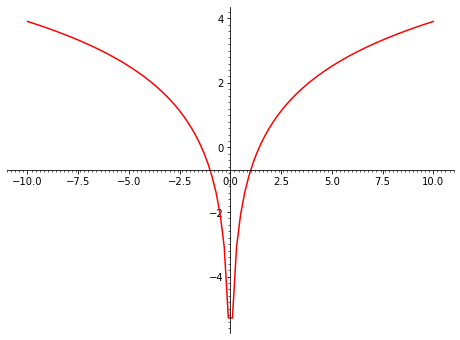

In [478]:
# a) Graficamente

fig, fig1 = plt.subplots(figsize =(8,6))
x = np.linspace(-10,10,100)
y = np.log(x**2)-0.7

fig1.spines['left'].set_position('center') 
fig1.spines['bottom'].set_position('center')
fig1.spines['top'].set_color('none')  
fig1.spines['right'].set_color('none') 

fig1.xaxis.set_minor_locator(ML(0.2))
fig1.yaxis.set_minor_locator(ML(0.2))

plt.plot(x,y,'r')

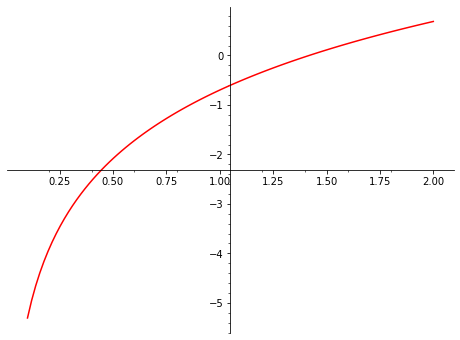

In [479]:
fig, fig1 = plt.subplots(figsize =(8,6))
x = np.linspace(0.1,2,100)
y = np.log(x**2)-0.7

fig1.spines['left'].set_position('center') 
fig1.spines['bottom'].set_position('center')
fig1.spines['top'].set_color('none')  
fig1.spines['right'].set_color('none') 

fig1.xaxis.set_minor_locator(ML(0.2))
fig1.yaxis.set_minor_locator(ML(0.2))

plt.plot(x,y,'r')

A maior raíz é encontrada no intervalo de [0.1 , 2], como pode ser visto nos dois gráficos acima.

In [480]:
# b) B, N = 3 e [0.5,2.0]
bissecao(0.5,2.0,f_ex3,0.1,3)

|k: 0|a : 0.5000000000 |b : 2.0000000000 |x : 1.2500000000 |f(x) : -0.2537128974 |f(a) : -2.0862943611 |
|k: 1|a : 1.2500000000 |b : 2.0000000000 |x : 1.6250000000 |f(x) : 0.2710156316 |f(a) : -0.2537128974 |
|k: 2|a : 1.2500000000 |b : 1.6250000000 |x : 1.4375000000 |f(x) : 0.0258109874 |f(a) : -0.2537128974 |
|k: 3|a : 1.2500000000 |b : 1.4375000000 |x : 1.3437500000 |f(x) : -0.1090715742 |f(a) : -0.2537128974 |


1.390625

Raíz achada: 1.390625

In [481]:
# c) FP, N = 3 e [0.5,2.0]
falsa_posicao(f_ex3,0.5,2.0,0.1,3)

k: 0|a : 0.5000000000 | b : 2.0000000000 |x : 1.6287074482 |f(x) : 0.2755734474 
k: 1|a : 0.5000000000 | b : 1.6287074482 |x : 1.4970143020 |f(x) : 0.1069453184 
k: 2|a : 0.5000000000 | b : 1.4970143020 |x : 1.4483985429 |f(x) : 0.0409169858 


1.4483985429092026

Raíz achada: 1.4483985429092026

In [482]:
# d) Compare e explique

Em ambos os métodos, com a restrição de apenas três iterações, assumindo que a tolerância é de 0.1 e considerando um intervalo de [0.5,2.0], a maior raíz foi encontrada, sendo esta perto de 1.5. Porém, a raíz encontrada do método da Bisseção foi menos precisa e levou mais iterações que a do método da Falsa Posição. Isso ocorre porque o método da Bisseção faz a média simples entre os pontos a e b, escolhendo qual ponto (a ou b) será substituido pela média simples, enquanto que a Falsa Posição faz a média ponderada entre os pontos.  

## QUESTÃO 4

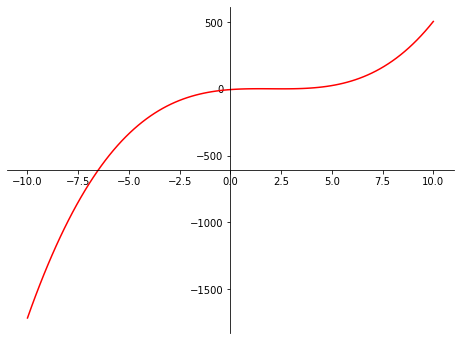

In [483]:
# a) Graficamente
fig, fig1 = plt.subplots(figsize =(8,6))
x = np.linspace(-10,10,100)
y = (x**3)-6*(x**2)+11*x-6.1

fig1.spines['left'].set_position('center') 
fig1.spines['bottom'].set_position('center')
fig1.spines['top'].set_color('none')  
fig1.spines['right'].set_color('none') 

plt.plot(x,y,'r')

In [484]:
# b) NR, N = 3 e x0 = 3.5
NR_N(f4 ,dif4 ,3.5 , 0.1 , 3)

k: 0 | x: 3.5000000000 | f(x): 1.7750000000
k: 1 | x: 3.1913043478 | f(x): 0.3994019890


3.068698821055097

In [485]:
# c) S, N = 3, x0 = 2.5 e x1 = 3.5
secante(f_ex4,2.5,3.5,0.1,3)

k: 0 | x: 2.5000000000 |
k: 1 | x: 3.5000000000 |
k: 2 | x: 2.7111111111 |
k: 3 | x: 2.8710905035 |


In [486]:
# d) Compare e explique